<h3>Loading Data</h3>

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
print(train_data.shape, train_targets.shape, test_data.shape, test_targets.shape)

(404, 13) (404,) (102, 13) (102,)


<h3>Preparing the Data</h3>

In [3]:
# Normalizing the data

mean = train_data.mean(axis = 0)
std = train_data.std(axis = 0)

x_train = train_data - mean
x_train /= std

x_test = test_data - mean
x_test /= std

<h3>Network Architecture</h3>

In [4]:
from keras import models
from keras import layers

def build_network() :
    network = models.Sequential()
    network.add(layers.Dense(64, activation = 'relu', input_shape = (13,)))
    network.add(layers.Dense(64, activation = 'relu'))
    network.add(layers.Dense(1))
    
    network.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    
    return network

<h3>Cross Validation and Model training</h3>

In [5]:
# k-fold cross validation

import numpy as np

k = 4
sample_size = len(x_train) // k
all_val_mae_history = []

for i in range(k) :
    print("Processing ", i)
    x_cval = x_train[i * sample_size : (i + 1) * sample_size] 
    y_cval = train_targets[i * sample_size : (i + 1) * sample_size]
    
    x_partial_train = np.concatenate([x_train[: i * sample_size], x_train[(i + 1) * sample_size :]], axis = 0)
    y_partial_train = np.concatenate([train_targets[: i * sample_size], train_targets[(i + 1) * sample_size :]], axis = 0)
    
    network = build_network()
    results = network.fit(x_partial_train, y_partial_train, validation_data = (x_cval, y_cval), epochs = 100, batch_size = 1, verbose = 0)
    
    val_mae_history = results.history['val_mae']
    
    all_val_mae_history.append(val_mae_history)

Processing  0
Processing  1
Processing  2
Processing  3


In [6]:
average_mae = [np.mean([x[i] for x in all_val_mae_history]) for i in range(100)]

<h3>Plotting Cross Validation Mean Absolute Error</h3>

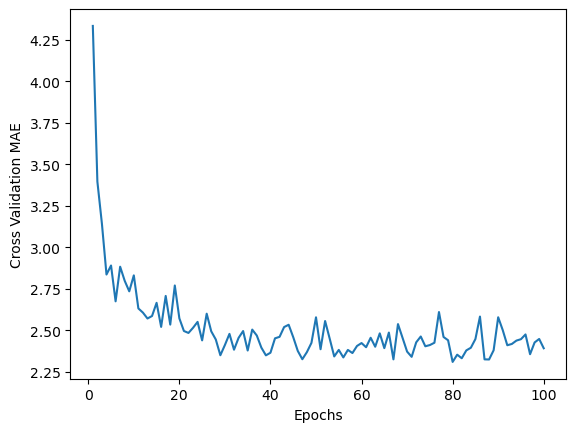

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

epochs = range(1, len(average_mae) + 1)

plt.plot(epochs, average_mae)
plt.xlabel('Epochs')
plt.ylabel('Cross Validation MAE')

plt.show()
plt.clf()

In [8]:
print(average_mae[40 : 60])
average_mae[51]

[2.450857639312744, 2.4598936438560486, 2.5188382863998413, 2.5326456427574158, 2.4580034613609314, 2.3750610649585724, 2.3250067830085754, 2.367821127176285, 2.4234995245933533, 2.577456057071686, 2.385258436203003, 2.5552183389663696, 2.449669450521469, 2.341815322637558, 2.3811296224594116, 2.3358033299446106, 2.381057471036911, 2.3622698187828064, 2.404816448688507, 2.4224203526973724]


2.5552183389663696

<h3>Final network</h3>

In [9]:
model = build_network()
train_results = model.fit(x_train, train_targets, epochs = 51, batch_size = 1, verbose = 0)

In [10]:
History = train_results.history

print(History.keys())
print(History['loss'][-1], History['mae'][-1])

dict_keys(['loss', 'mae'])
6.045799732208252 1.5948638916015625


<h3>Evaluating on Test Data</h3>

In [11]:
test_results = model.evaluate(x_test, test_targets)
test_results

4/4 [==============================] - 0s 5ms/step - loss: 14.3137 - mae: 2.4135


[14.313740730285645, 2.413484811782837]

In [12]:
########## On new data, first normalize it using the mean and std used for preparing the data, then for
########## prediction use model.predict() with the input argument being the normalized data.